# Analyze Financial Data with Python Capstone Project

In [119]:
from math import sqrt, log
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
def display_as_percentage(val):
    return '{:.1f}%'.format(val * 100)

## Import Financial Data

Importing CSV file with monthly adjusted closing prices from 2018 to 2020 for Disney (DIS), Tesla (TSLA), Materials Select Sector SPDR Fund (XLB), Bank of America (BAC), Redfin (RDFN), and Pfizer (PFE).

In [121]:
stock_df = pd.read_csv('stock_download.csv')
stock_df.head()

,Date,DIS,TSLA,XLB,BAC,RDFN,PFE
0,2018-01-31,107.881365,67.716666,59.145768,29.165295,25.340476,31.088448
1,2018-02-28,102.596202,67.155474,56.394969,29.531128,21.513158,30.183143
2,2018-03-31,99.471049,63.196666,55.392019,29.539311,22.127143,30.488486
3,2018-04-30,97.667746,57.954571,54.578971,28.163238,22.603809,30.706343
4,2018-05-31,99.050514,57.970455,55.319540,28.346297,22.189545,30.271467


In [122]:
stock_df.tail()

,Date,DIS,TSLA,XLB,BAC,RDFN,PFE
31,2020-08-31,129.046665,360.059711,61.760113,25.488668,44.528334,35.571057
32,2020-09-30,129.428096,413.495239,63.826960,24.743030,48.260953,33.807280
33,2020-10-31,124.371819,427.209545,64.547040,24.221761,49.542727,34.222756
34,2020-11-30,138.880000,465.612498,68.889296,26.647415,44.306500,35.645739
35,2020-12-31,166.927272,638.818640,71.152610,29.207377,65.641818,38.529486


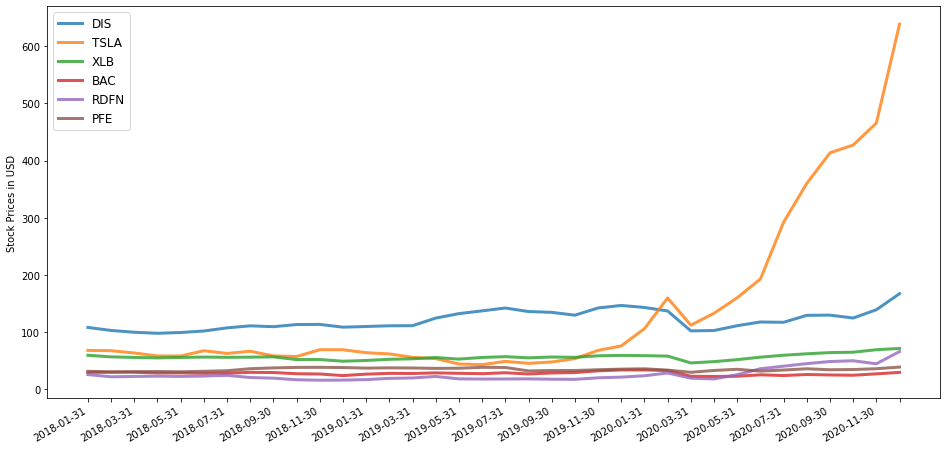

In [123]:
dates = stock_df['Date']
prices = stock_df.drop(columns = 'Date')

fig, ax = plt.subplots(figsize = (16,8))

for c in prices.columns.values:
    ax.plot(dates, prices[c], lw = 3, alpha = 0.8, label = c)

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
fig.autofmt_xdate()
ax.legend(loc = 'upper left', fontsize = 12)
ax.set_ylabel('Stock Prices in USD')
plt.show()

Looking at the chart above Tesla's stock price sky rocketed at the start of 2020 while the other stocks remained steady.

## Financial Statistics

Defining financial statistics functions.

In [124]:
def simple_returns(start_price, end_price, dividends = 0):
    simple_return = (end_price - start_price + dividends) / start_price
    return simple_return

def calculate_log_returns(start_price, end_price):
    log_r = log(end_price) - log(start_price)
    return log_r

def annualize_return(log_return, t):
    annual_r = log_return * t
    return annual_r

def calculate_variance(dataset):
    mean = sum(dataset)/len(dataset)
    numerator = 0
    
    for data in dataset:
        numerator += (data - mean) ** 2

    return numerator / len(dataset)

def calculate_stddev(dataset):
    variance = calculate_variance(dataset)
    return sqrt(variance)

def calculate_correlation(set_x, set_y):
    sum_x = sum(set_x)
    sum_y = sum(set_y)

    sum_x2 = sum([x ** 2 for x in set_x])
    sum_y2 = sum([y ** 2 for y in set_y])

    sum_xy = sum([x * y for x, y in zip(set_x, set_y)])

    n = len(set_x)

    numerator = n * sum_xy - sum_x * sum_y
    denominator = sqrt((n * sum_x2 - sum_x ** 2) * (n * sum_y2 - sum_y ** 2))

    return numerator / denominator

### Simple Rate of Return

After inspecting the dataframe, I want to calculate the simple returns of the monthly prices and store as a dataframe with the returns shifted 1 row down.

In [125]:
simple_returns_df = stock_df #create duplicate dataframe to run function with
col = 1 #to omit the date column in the dataframe
total_columns = len(simple_returns_df.columns) #number of columns to iterate through
row_len = len(simple_returns_df) #number of closing price to iterate through

while col < total_columns:
    simple_r = []
    i = 1
    for row_value in simple_returns_df.iloc[:,col]:
        simple_r.append(simple_returns(row_value, simple_returns_df.iloc[i,col]))
        if i < row_len-1:
            i += 1
        else:
            break
    simple_returns_df[simple_returns_df.columns[col]] = pd.Series(simple_r)
    col += 1
    
simple_returns_df = simple_returns_df.shift()
simple_returns_df = simple_returns_df.drop(columns = 'Date')
simple_returns_df = simple_returns_df.drop(simple_returns_df.head(1).index)
simple_returns_df = simple_returns_df.reset_index(drop = True)

dates = stock_df
dates = dates['Date'].reset_index(drop = True)
dates = dates.drop(dates.head(1).index).reset_index(drop = True)
dates = dates.reset_index()

simple_returns_df = dates.join(simple_returns_df)
simple_returns_df = simple_returns_df.drop(columns = 'index')
simple_returns_df

,Date,DIS,TSLA,XLB,BAC,RDFN,PFE
0,2018-02-28,-0.048991,-0.008287,-0.046509,0.012543,-0.151036,-0.029120
1,2018-03-31,-0.030461,-0.058950,-0.017784,0.000277,0.028540,0.010116
2,2018-04-30,-0.018129,-0.082949,-0.014678,-0.046584,0.021542,0.007146
3,2018-05-31,0.014158,0.000274,0.013569,0.006500,-0.018327,-0.014162
4,2018-06-30,0.026374,0.157833,0.013093,-0.026493,0.026545,0.027188
5,2018-07-31,0.054017,-0.070398,-0.008183,0.012213,0.055420,0.033539
6,2018-08-31,0.033150,0.061670,0.005633,0.048816,-0.159179,0.109223
7,2018-09-30,-0.013392,-0.123988,0.007950,-0.011617,-0.055221,0.040417
8,2018-10-31,0.034428,-0.017766,-0.083415,-0.072122,-0.145160,0.022578
9,2018-11-30,0.002154,0.208785,0.002074,-0.016823,-0.049495,0.003513


In [126]:
avg_returns = simple_returns_df.mean()
annual_returns = annualize_return(avg_returns, 12)
annual_returns = annual_returns.reset_index()
annual_returns = annual_returns.rename(columns = {'index':'Ticker', 0:'Annualized Return'})
annual_returns.sort_values('Annualized Return', ascending = False)

,Ticker,Annualized Return
1,TSLA,0.973761
4,RDFN,0.477347
0,DIS,0.183324
5,PFE,0.092957
2,XLB,0.081450
3,BAC,0.040233


Tesla and Redfin stocks have the highest annual returns in the 3 year analysis. Tesla has an annual return of 97.4% and Redfin has an annual return of 47.7%.

### Log Returns

Here I calculate the monthly log returns from 2018 to 2020. Log returns do not react to huge shift in adjusted closing prices as much and thus are lower versus simple rate of return. Again, I shifted the rows down 1 to have the date correlate with the end date price used.

In [127]:
log_return_df = pd.read_csv('stock_download.csv')
col = 1 #to omit the date column in the dataframe
total_columns = len(log_return_df.columns) #number of columns to iterate through
total_rows = len(log_return_df) #number of rows

while col < total_columns:
    log_r = []
    i = 1
    for row_value in log_return_df.iloc[:,col]:
        log_r.append(calculate_log_returns(row_value, log_return_df.iloc[i,col]))
        if i < total_rows - 1:
            i += 1
        else:
            break
    log_return_df[log_return_df.columns[col]] = pd.Series(log_r)
    col += 1

log_return_df = log_return_df.shift()
log_return_df = log_return_df.drop(columns = 'Date')
log_return_df = log_return_df.drop(log_return_df.head(1).index)
log_return_df = log_return_df.reset_index(drop = True)

log_return_df = dates.join(log_return_df)
log_return_df = log_return_df.drop(columns = 'index')
log_return_df

,Date,DIS,TSLA,XLB,BAC,RDFN,PFE
0,2018-02-28,-0.050231,-0.008322,-0.047625,0.012465,-0.163738,-0.029553
1,2018-03-31,-0.030934,-0.060759,-0.017944,0.000277,0.028140,0.010065
2,2018-04-30,-0.018295,-0.086592,-0.014787,-0.047704,0.021313,0.007120
3,2018-05-31,0.014059,0.000274,0.013478,0.006479,-0.018497,-0.014264
4,2018-06-30,0.026032,0.146550,0.013008,-0.026850,0.026199,0.026825
5,2018-07-31,0.052608,-0.072999,-0.008217,0.012139,0.053938,0.032989
6,2018-08-31,0.032612,0.059843,0.005617,0.047661,-0.173377,0.103660
7,2018-09-30,-0.013483,-0.132375,0.007919,-0.011685,-0.056804,0.039621
8,2018-10-31,0.033849,-0.017926,-0.087101,-0.074855,-0.156840,0.022327
9,2018-11-30,0.002152,0.189615,0.002072,-0.016966,-0.050762,0.003507


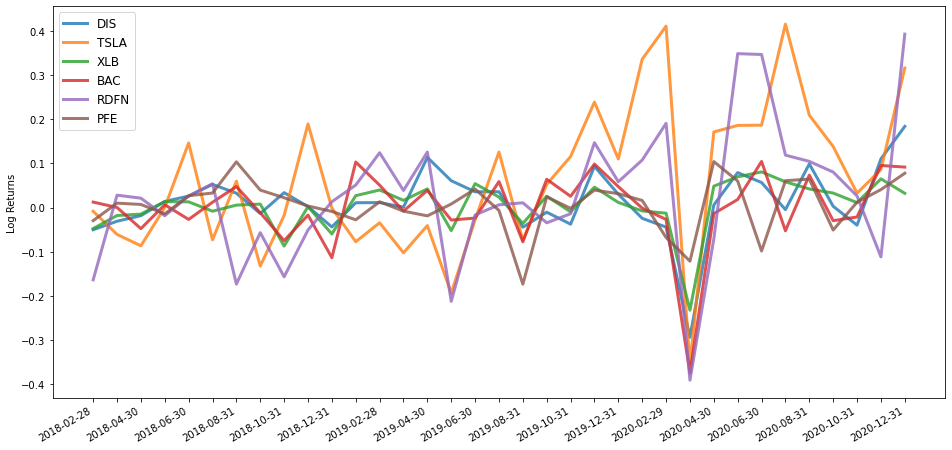

In [128]:
dates = log_return_df['Date']
log_return = log_return_df.drop(columns = 'Date')

fig, ax = plt.subplots(figsize = (16,8))

for c in log_return.columns.values:
    ax.plot(dates, log_return[c], lw = 3, alpha = 0.8, label = c)

every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        
fig.autofmt_xdate()
ax.legend(loc = 'upper left', fontsize = 12)
ax.set_ylabel('Log Returns')
plt.show()

In [129]:
avg_log_returns = log_return_df.mean()
annual_log_returns = annualize_return(avg_log_returns, 12)
annual_log_returns = annual_log_returns.reset_index()
annual_log_returns = annual_log_returns.rename(columns = {'index':'Ticker', 0:'Annualized Return'})
annual_log_returns.sort_values('Annualized Return', ascending = False)

,Ticker,Annualized Return
1,TSLA,0.769470
4,RDFN,0.326335
0,DIS,0.149666
5,PFE,0.073573
2,XLB,0.063368
3,BAC,0.000494


Tesla and Redfin have the highest annualized log return at 76.9 and 32.6% respectively.

All tickers saw a huge decrease in returns around March 2020 due to the COVID-19 pandemic declaration by the WHO. Pfizer (PFE) saw the least decrease during that time. Tesla and Redfin from the graph have 3 big spikes in returns. One prior to the declaration, one mid 2020, and another at the end of 2020.

### Mean, Variance & Standard Deviation Analysis

In [130]:
var_table = log_return_df.var().reset_index()
var_table = var_table.rename(columns = {'index':'Ticker', 0:'Variance'})
var_table.sort_values('Variance', ascending = False)

,Ticker,Variance
1,TSLA,0.028447
4,RDFN,0.024160
3,BAC,0.007254
0,DIS,0.005728
5,PFE,0.003329
2,XLB,0.003181


In [131]:
std_table = log_return_df.std().reset_index()
std_table = std_table.rename(columns = {'index':'Ticker', 0:'Std Dev'})
std_table.sort_values('Std Dev', ascending = False)

,Ticker,Std Dev
1,TSLA,0.168663
4,RDFN,0.155435
3,BAC,0.085168
0,DIS,0.075687
5,PFE,0.057695
2,XLB,0.056400


In [132]:
log_r_mean = log_return_df.mean().reset_index()
log_r_mean = log_r_mean.rename(columns = {'index':'Ticker', 0:'Mean'})
log_r_mean.sort_values('Mean', ascending = False)

,Ticker,Mean
1,TSLA,0.064123
4,RDFN,0.027195
0,DIS,0.012472
5,PFE,0.006131
2,XLB,0.005281
3,BAC,0.000041


Redfin and Tesla both have high returns; however, both are highly risky investments with a standard deviation of 16.9% and 15.5%, respectively.

### Correlation Analysis

In [133]:
log_returns_only = log_return_df.drop(columns = 'Date')

In [134]:
ticker_list = [x for x in log_returns_only.columns]
correlation_list = log_returns_only.corr()
correlation_list

,DIS,TSLA,XLB,BAC,RDFN,PFE
DIS,1.000000,0.412922,0.747517,0.807010,0.565526,0.529276
TSLA,0.412922,1.000000,0.555877,0.437999,0.626654,0.321393
XLB,0.747517,0.555877,1.000000,0.826537,0.665090,0.444438
BAC,0.807010,0.437999,0.826537,1.000000,0.546411,0.413268
RDFN,0.565526,0.626654,0.665090,0.546411,1.000000,0.099197
PFE,0.529276,0.321393,0.444438,0.413268,0.099197,1.000000


BAC, DIS, and XLB are all closely correlated with each other while RDFN and PFE are not closely correlated. Overall, all tickers move in the positive direction to each other.